## K-Nearest Neighbors(KNN)

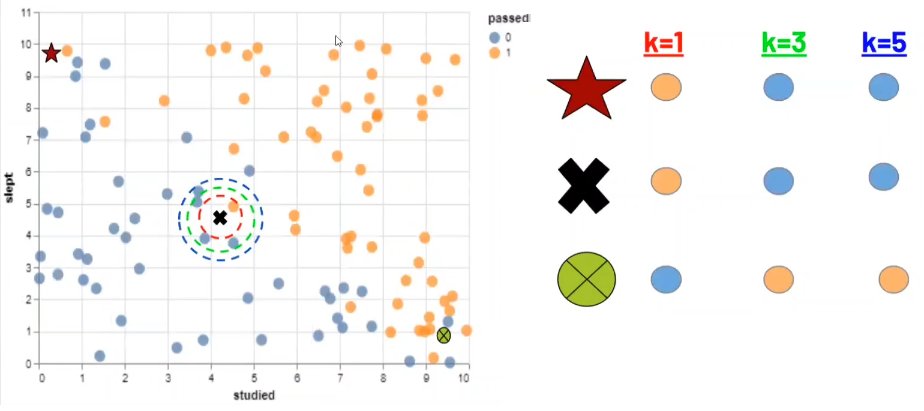

yukarıda 3 örnekte incelendiği gibi, KNN modellerde en yakın komşu/komşuların durumuna göre tahmin yapılır. K ile en yakın kaç komşunun dikkate alınacağını belirleriz. Ayrıca komşuların mesafelerinin eşdeğer ağırlıkta olmasına yada mesafesine göre ağırlıklandırılacak şekilde olmasına bağlı olarak tercihlerde bulunabiliriz.

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [102]:
df = pd.read_csv('gene_expression.csv')                    
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


target variable "Canser Present" ;     kanser: 1 , kanser değil: 0

features ; "Gene One" ve "Gene Two"  (gen 1 ve gen 2)

## Exploratory Data Analysis and Visualization

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gene One,3000.0,5.600133,1.828388,1.0,4.3,5.6,6.9,10.0
Gene Two,3000.0,5.410467,1.729081,1.0,4.0,5.4,6.7,10.0
Cancer Present,3000.0,0.500000,0.500083,0.0,0.0,0.5,1.0,1.0


mean, %50 ve std değerlere baktığımızda features ve target variable dağılımlarının normal olduğunu gözlemleyebiliyoruz

In [105]:
df["Cancer Present"].value_counts()             

1    1500
0    1500
Name: Cancer Present, dtype: int64

balance data

In [106]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7);

In [107]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(3,6)
plt.ylim(4,8)

# flu bölgeye zoomlama yapıyoruz. xlim ve ylim ile bölge belirttik

(4.0, 8.0)

<IPython.core.display.Javascript object>


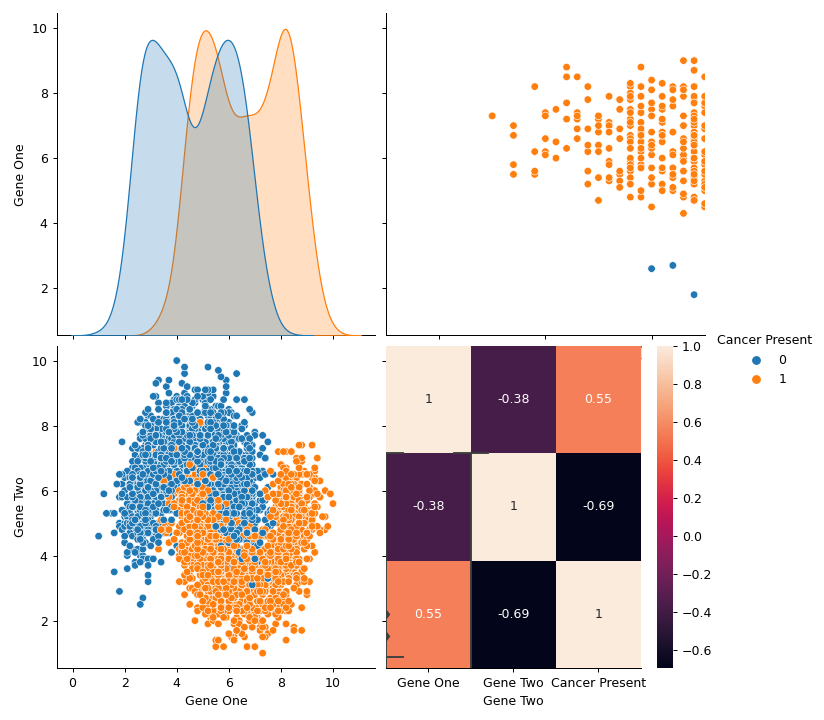

In [108]:
sns.pairplot(data=df, hue="Cancer Present", height=4, aspect =1);

In [109]:
sns.boxplot(x= 'Cancer Present', y = 'Gene One', data=df);

Gene One ile Canser Present ilişkisine baktığımızda Gene One arttıkça Canser Present 1 olma durumu artıyor. Gene One 3 ten aşağısında Canser Present 1 olma durumu yok. Gene One 8 den sonrası kesin 1 oluyor diyebiliriz.

In [110]:
sns.boxplot(x= 'Cancer Present', y = 'Gene Two', data=df);

Gene Two ile Canser Present ilişkisine baktığımızda Gene Two arttıkça Canser Present 0 olma durumu artıyor. Gene Two 2 nin altındaysa kesin olarak Canser Present 1, 8 den sonrası kesin olarak Canser Present 0 oluyor diyebiliriz.

In [111]:
sns.heatmap(df.corr(), annot=True);

korelasyon durumuna baktığımızda;

* Canser Present ile Gene One arasında 0.55 orta seviyede pozitif yönlü bir korelasyon var
* Canser Present ile Gene Two arasında -0.69 güçlü sayılabilecek seviyede negatif yönlü bir korelasyon var

korelasyonların yeterince güçlü olmaması scorelarımızda daha yüksek sonuçlar almamız noktasında bir beklenti oluşturabilir

<IPython.core.display.Javascript object>


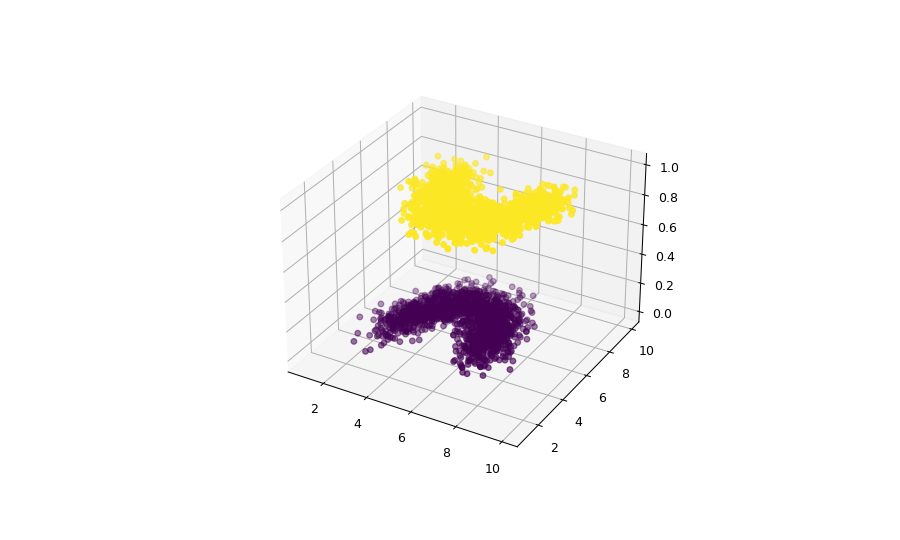

In [112]:
#%matplotlib inline
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'],c=df['Cancer Present']);

## Train|Test Split and Scaling Data

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [114]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

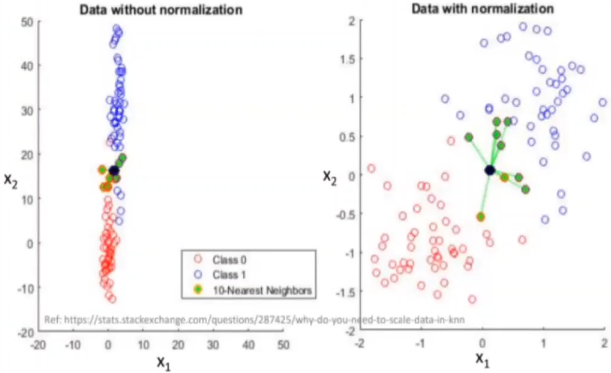

Bazı makine öğrenmesi algoritmaları özellikle mesafe/uzaklık üzerine kurgulanmış olanları (distance based) doğası gereği girdi değişkenlerinin birbirleri ile aynı aralıkta ve mümkünse küçük sayılardan oluşmasını tercih ediyorlar. Burada durum algoritmanın matematiğinden kaynaklanan bir durum olmasından dolayı zorunlu bir tercih aslında.

Örneğin iki girdi değişken düşünelim. Birisi balık yaşı diğeri de balıktan çıkan yumurta sayısı (bir nevi gelir) olsun diyelim. Yaş belki [1,2,3…] diye devam eden bir array iken yumurta ise [500,800,950…] olarak devam edebilir. İşte bu regresyon probleminde aynı skala içinde yer almayan değişkenlerin bazı algoritmalar açısından sorun çıkarma durumu olabilir. Fetaure Scalling normalizasyon ve standartizasyon yöntemleri ile değişkenlerimizi ölçekleyerek, farklı değişkenleri eşit temelde karşılaştırmamıza yardımcı olur.,

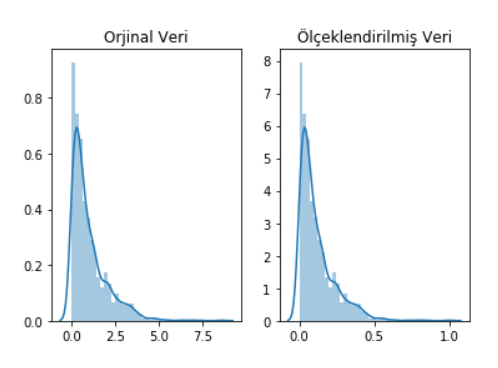

standartizasyonda fetaures değerlerimiz belirli bir ölçeklendirme ile 0-1 aralığına sıkıştırılır. Dağılımlarında bir değişim olmaz.

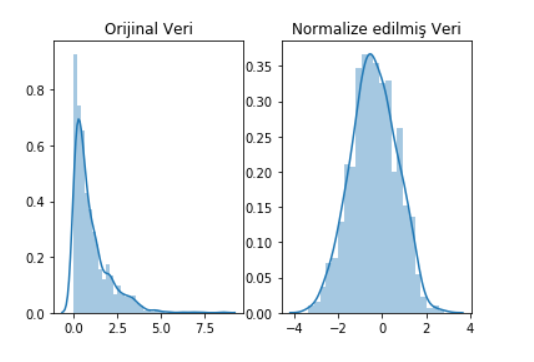

Normalizasyonda ise dağılımda bir değişiklik yaparak normal dağılıma uyacak şekilde scale yapılır.

KNN ve SVM gibi Distance Based algoritmalar feature scalling e ihtiyaç duyarlar. Olmazsa olmaz diyebiliriz.


In [116]:
scaler = StandardScaler()

In [117]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn_model = KNeighborsClassifier(n_neighbors=5) # default değer k=5 tir. k değerini burada veriyoruz

In [120]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [121]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [122]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [123]:
pd.DataFrame(y_pred_proba)

# k=5 aldığımız için en yakın 5 komşunun class değerine bakıyor. 
# 5 komşudan 2 si class0, 3 ü class1 ise 0.4 ve 0.6 olasılık değerleri olur

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [124]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [125]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
2509,1,1,1.0,0.0
2563,0,0,0.2,0.8
2816,0,0,0.0,1.0
2525,1,1,1.0,0.0
787,1,1,0.8,0.2
2603,1,1,1.0,0.0
654,1,1,0.8,0.2
2576,0,0,0.0,1.0
1964,1,0,0.0,1.0
1269,1,1,0.8,0.2


## Model Performance on Classification Tasks

In [126]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [127]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]], dtype=int64)

<IPython.core.display.Javascript object>


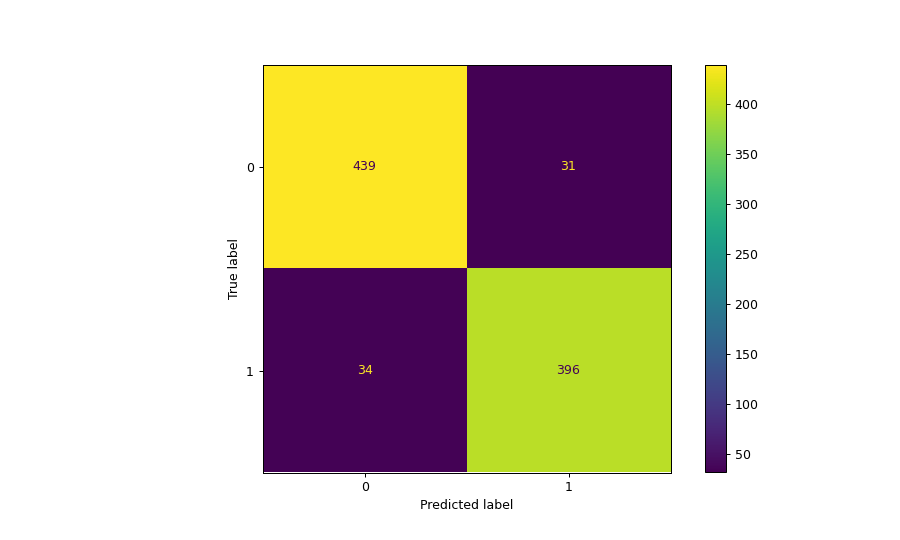

In [128]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [129]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



kanser, sağlık alanındaki datalarda recall değerinin yüksek olmasını bekleriz, precision, recall ve f1 score larının uyumlu olması ve datamızın balance data olması nedeniyle accuracy score değerine de bakıyoruz. 

accuracy score değerimiz aynı zamanda micro avg değerimizdir. yazmasada precision, recal  ve f1 micro değerleri aynı olduğu için sadece f1-score altında yazar. macro avg uada weighted avg farklı çıkabilir fakat micro avg tüm score lar için aynıdır.

balance datada micro avg (accuracy), unbalance datada macro avg, multiclass data da weighted avg ye bakılır.

## Elbow Method for Choosing Reasonable K Values

In [130]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [131]:
# her bir k değeri için error rates hesaplayarak aşağıda görselleştiriyoruz

test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)             # for döngüsüyle 1 den 29 a kadar k değerleri için fit yapıyoruz
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)              # test ve train setler için predict yapıyoruz
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)     # error rates lari bulmak için accuracy score değerini 1 de çıkardık
    test_error_rates.append(test_error)                     # score ların uyumsuz olması yada unbalanced durumda f1 yada recall
                                                            # değeride alınabilir
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

<IPython.core.display.Javascript object>


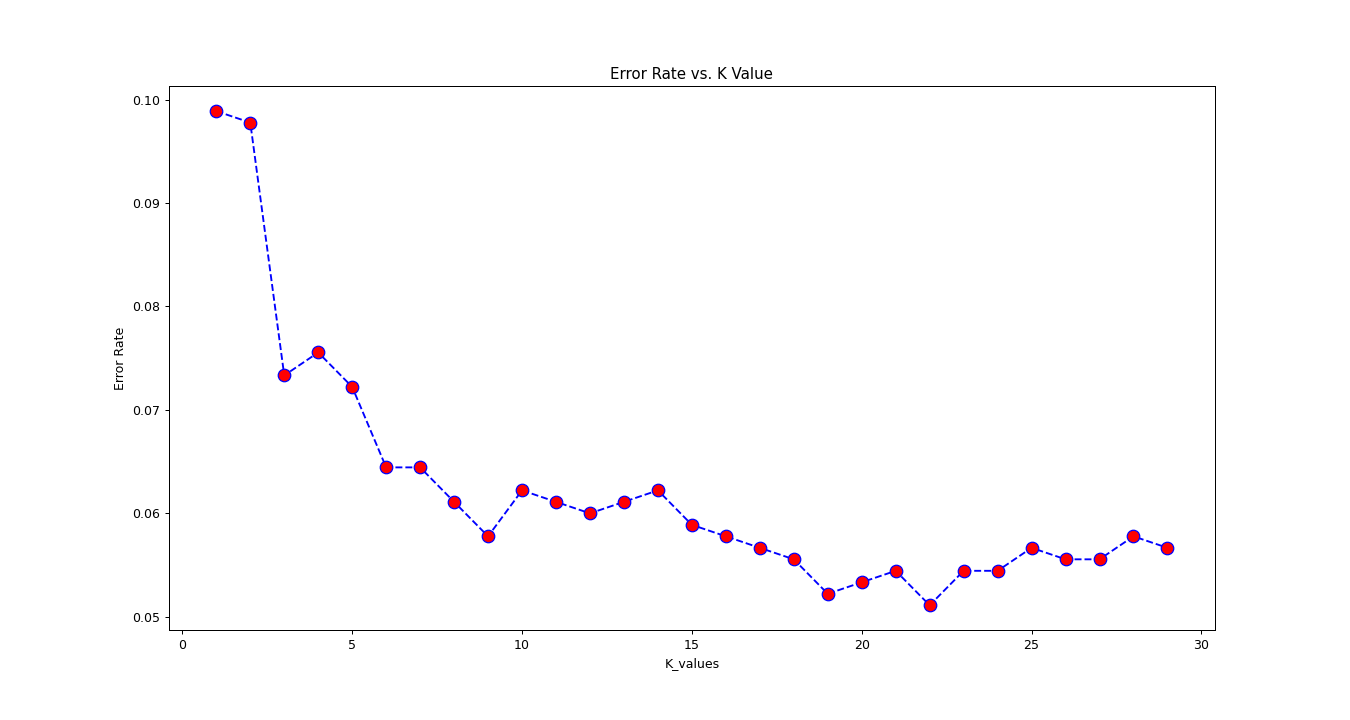

Text(0, 0.5, 'Error Rate')

In [132]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

k değeri arttıkça hata oranımız düşüyor, dikkat edilirse k=22 den sonra hata oranı artmaya başlıyor. hata oranımızın en düşük olduğu yer k=22 dir. k=9 da da bir dirsek noktamız var, burayı baz alarak k=22 ile hata oranlarını aşağıda karşılaştırdığımızda; k=22 tüm mesafe hesaplamalarının artacak olması nedeniyle model maliyetinin artması göz önüne alındığnda k=9 tercih edilebilir gibi. değerlendirmeye devam ediyoruz.

<IPython.core.display.Javascript object>


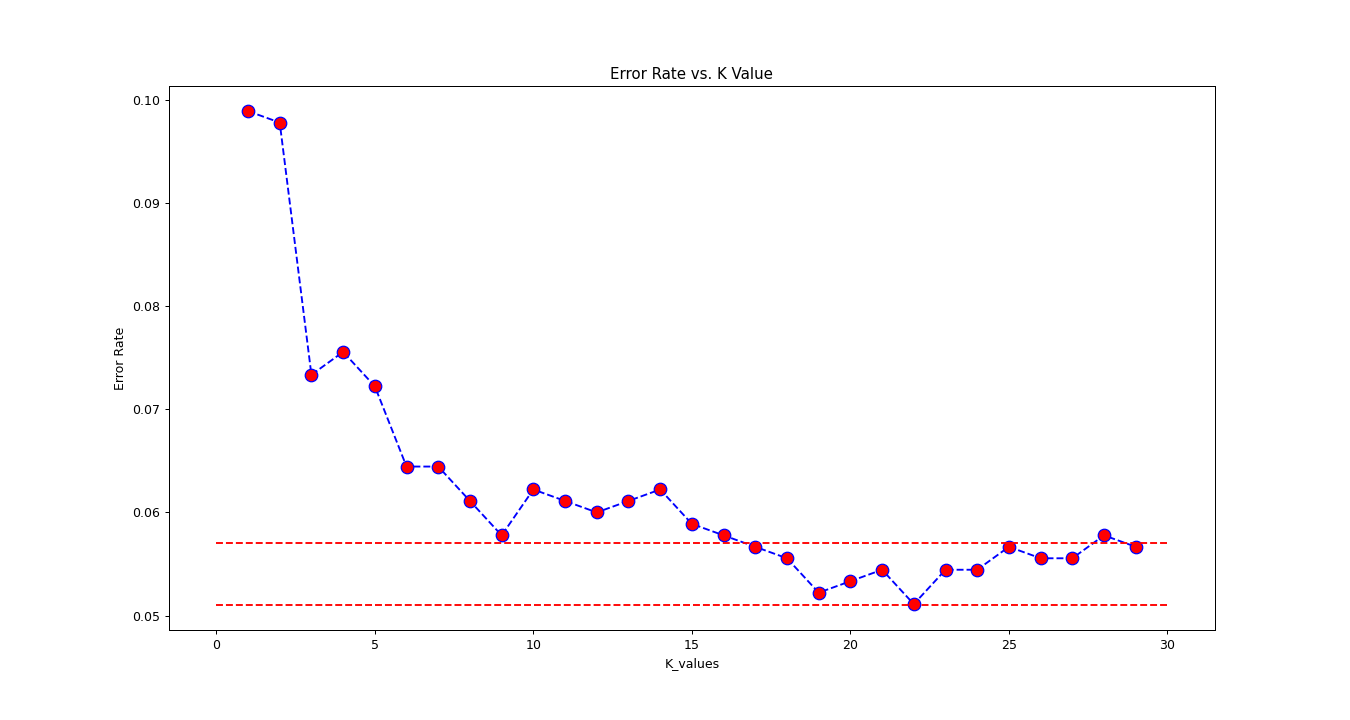

In [133]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

<IPython.core.display.Javascript object>


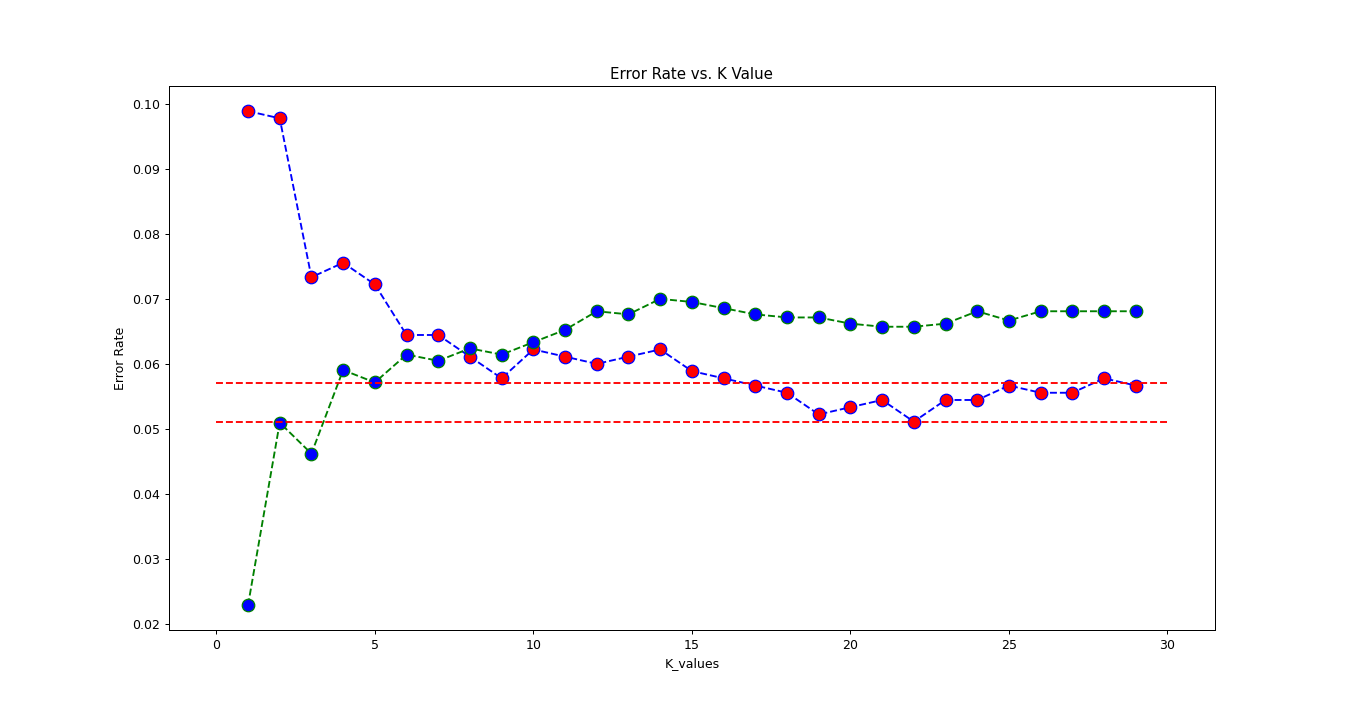

In [134]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--") #Bunları ekledim
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

burada ise k=9 dan sonra test ve train hata oranlarını arasındaki farkın açılması nedeniyle overfitting e gidebilecek bir durum olduğu değerlendirmesi yapabiliyoruz. k=22 de overfitting durumu olabilir

## Scores by Various K Values

bir kaç farklı K değeri için score lara bakıyoruz

In [135]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print()
    
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [136]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set

[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [137]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set

[[452  18]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [138]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set

[[446  24]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[ 961   69]
 [  60 1010]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [139]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train_scaled,y_train)
print('WITH K=16\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=16

Test_Set

[[448  22]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[961  69]
 [ 78 992]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



farklı K değerleri için score lara baktığımızda k=9 ve k=22 score ları arasında ciddi bir fark olmadığını görebiliyoruz. score lar birbirine yakın. bu nedenle yine yukarda bahsettiğimiz overfitting olabilme ihtimali ve model maliyetleri göz önüne alındığında k=9 tercih edilebilir diyebiliriz.

## Cross Validate For Optimal K Value

In [140]:
from sklearn.model_selection import cross_val_score, cross_validate

In [141]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003000,0.022607,0.923810,0.933333,0.915888,0.924528
2,0.001999,0.013374,0.947619,0.944444,0.953271,0.948837
3,0.001993,0.010001,0.947619,0.970588,0.925234,0.947368
4,0.001000,0.011001,0.866667,0.876190,0.859813,0.867925
5,0.001000,0.008002,0.923810,0.909910,0.943925,0.926606
6,0.000000,0.000000,0.919048,0.924528,0.915888,0.920188
7,0.000000,0.015674,0.942857,0.927928,0.962617,0.944954
8,0.000000,0.015630,0.938095,0.927273,0.953271,0.940092
9,0.000000,0.015630,0.961905,0.980583,0.943925,0.961905
10,0.000000,0.000000,0.890476,0.868421,0.925234,0.895928


In [142]:
df_scores.mean()[2:]

test_accuracy     0.926190
test_precision    0.926320
test_recall       0.929907
test_f1           0.927833
dtype: float64

## Predict New Observation

In [143]:
new_observation = [[3.5, 4.3]] 

In [144]:
knn_model.predict(new_observation)

array([1], dtype=int64)

In [145]:
knn_model.predict_proba(new_observation)

array([[0.34482759, 0.65517241]])

modelimiz scale sonrası fit edildiği için scale edilmiş veri üzerinden prediction yapılmalı yoksa hatalı sonuç alabiliriz. üstteki kodlar scale edilmemiş veri için yapılan prediction, sonuç 1 çıktı. alttaki prediction ise scale edilmiş veri üzerinden yapıldı sonuç 1.

In [146]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-1.1393583 , -0.62176572]])

In [147]:
knn_model.predict(new_observation_scaled)

array([0], dtype=int64)

In [148]:
knn_model.predict_proba(new_observation_scaled)

array([[0.62068966, 0.37931034]])

## Gridsearch Method for Choosing Reasonable K Values

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
knn_grid = KNeighborsClassifier()

In [151]:
k_values= range(1,30)

In [152]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

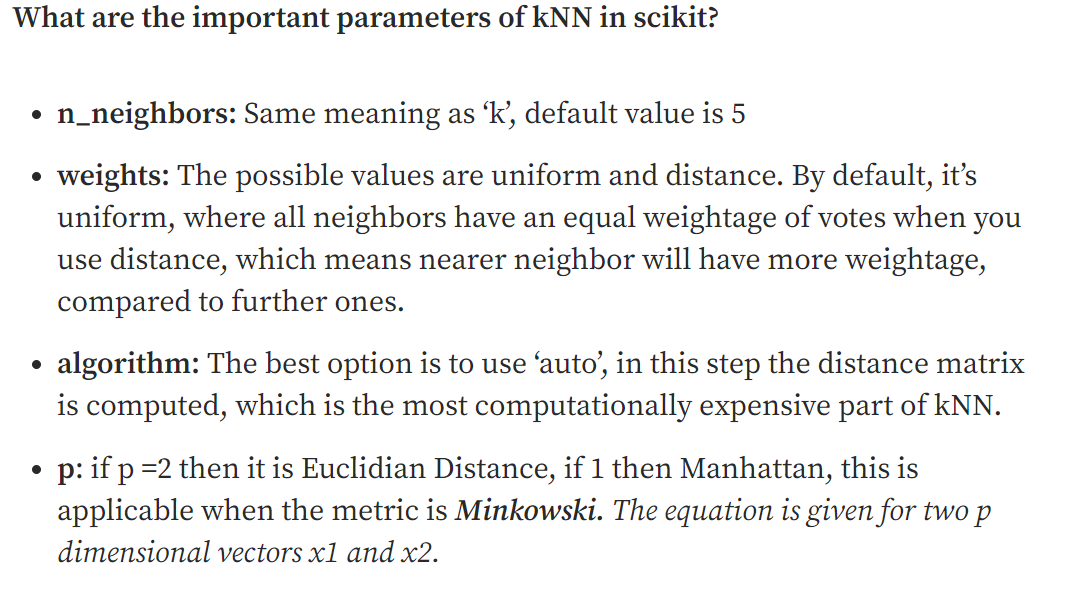

In [153]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [154]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [155]:
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}

KNN de GridSearch sonrası bulunan K değeri Overfitting e gidebilir. buna dikkat

In [156]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[449  21]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



## Evaluating ROC Curves and AUC

In [157]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [158]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

<IPython.core.display.Javascript object>


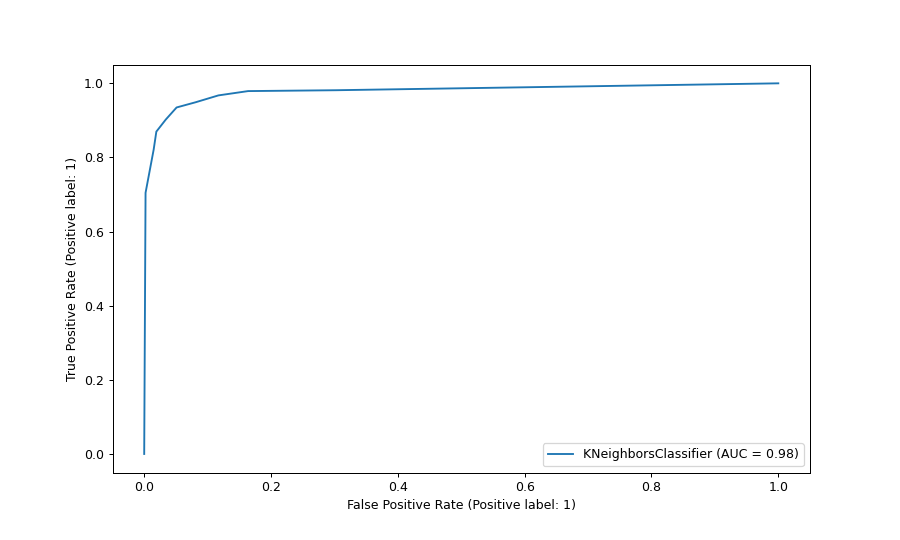

In [159]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

In [160]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9781296387926769

## Final Model and Model Deployment

In [161]:
import pickle

In [162]:
scaler = StandardScaler()

In [163]:
scaler.fit(X)                   # burada verilerimize göre yapılacak olan scale işleminin matematiksel hesaplamaları 
                                # (formülasyon) arka planda hazırlanıyor fakat transform komutu olmadan icraya geçilmiyor

StandardScaler()

In [164]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))      

# scaler.fit(X) sonrası pickle yaparak, lokalimize scale hesaplama formülasyonunu kaydetmiş oluyoruz

In [165]:
X_scaled = scaler.transform(X)

In [166]:
final_knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_scaled,y)

In [167]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

## Predict New Observations

In [168]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [169]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [170]:
X.describe()

,Gene One,Gene Two
count,3000.000000,3000.000000
mean,5.600133,5.410467
std,1.828388,1.729081
min,1.000000,1.000000
25%,4.300000,4.000000
50%,5.600000,5.400000
75%,6.900000,6.700000
max,10.000000,10.000000


In [171]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }

In [172]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [173]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00],
       [ 2.18735536e-01, -2.55118325e+00]])

In [174]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [175]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000


## Pipeline

What happens can be described as follows:

Step 1: The data are split into TRAINING data and TEST data according to ratio of train_test_split-train ve test olarak ayır

Step 2: the scaler is fitted on the TRAINING data - Train datasını fit et

Step 3: the scaler transforms TRAINING data - train datasını transform et

Step 4: the models are fitted/trained using the transformed TRAINING data

Step 5: the scaler is used to transform the TEST data

Step 6: the trained models predict using the transformed TEST data



In [176]:
from sklearn.pipeline import Pipeline

In [177]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

operations a liste formatında iki argüman tanımlıyoruz. ilk sırada fit transform yapılabilecek olan scaler a kullanacağımız scale yöntemi atanıyor, ikinci sırada ise fit predict yapılabilecek olan ML algoritması atanır. pipeline sırayla çalıştığı için burdaki sıra önemli. ilk kısma fit.transform yapılabilen poly de yazılabilir

In [178]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [179]:
pipe_model = Pipeline(steps=operations)

In [180]:
pipe_model.fit(X_train, y_train)         # scale yapıp modeli fit ediyor. 

# pipe.fit(X_train, y_train)--> scaler.fit_transform(X_train) --> knn.fit(scaled_X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [181]:
y_pred = pipe_model.predict(X_test)

# pipe.predict(X_test) --> scaler.transform(X_test) --> knn.predict(scaled_X_test)

In [182]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

## Model Performance

In [184]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

<IPython.core.display.Javascript object>


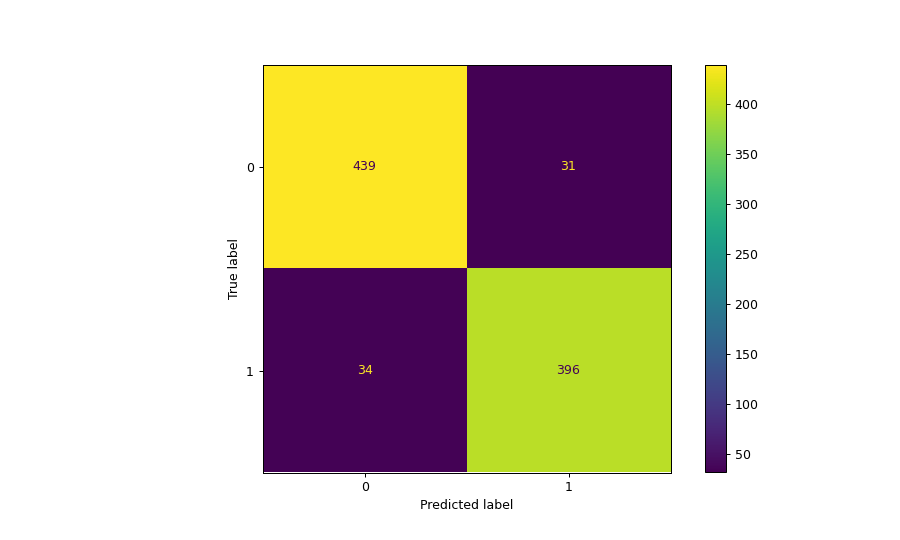

In [185]:
plot_confusion_matrix(pipe_model, X_test, y_test); 

# normalde buraya scale edilmiş test datamı verecektim ama pipline da buna gerek yok. kendisi hallediyor

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Changing the parameters of the pipe_model

In [187]:
pipe_model.get_params()                  # pipe_model e kayıtlı parametreleri getiriyor. parametrelerin başında yazan 
                                         # "scaler" "knn" i ilk başta biz tanımladık dikkat

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [188]:
pipe_model.set_params(knn__n_neighbors= 9)            # parametre değişikliği sırasında parametre adının yukarda yazdığı gibi 
                                                      # yazılması önemli yoksa hata verir

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [189]:
pipe_model.get_params()                               # parametre değişikliği sonrası pipe_model parametrelerine bakıyoruz

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [95]:
pipe_model['scaler']               # pipe_model "scaler" sorguluyoruz

StandardScaler()

In [96]:
pipe_model["knn"]                  # pipe_model "knn" sorguluyoruz

KNeighborsClassifier(n_neighbors=9)

## GridSearch on Pipeline

In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
param_grid = {'knn__n_neighbors': range(1,30)}
pipe_model = Pipeline(steps=operations)                # model sıfırlıyoruz

In [199]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'f1')

In [200]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [201]:
pipe_grid.best_params_

{'knn__n_neighbors': 21}

## CrossValidate on Pipeline

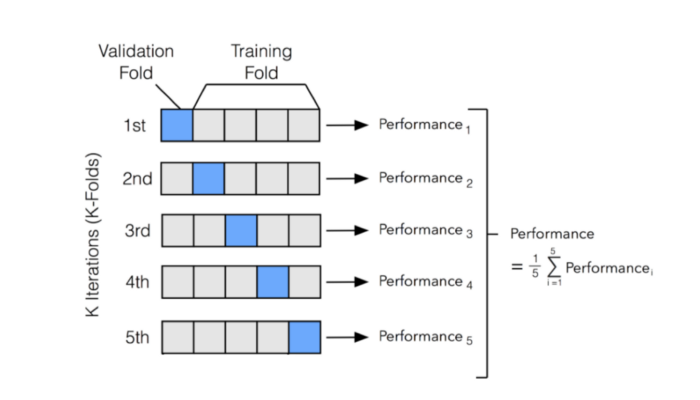

In [202]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.925515
test_recall       0.930841
test_f1           0.927874
test_accuracy     0.926190
dtype: float64

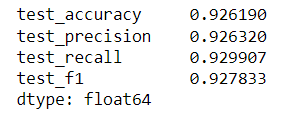 ilk CV scoreları ile pipeline CV scorelarını karşılaştıralım

CV sırasında her validasyon sırasında train setimiz kendi içinde train ve test seti olarak ayrılarak score lar buluyor. her validasyon arasında model sıfırlanmış oluyor ve veri sızıntısı olmadığı ön kabulumuz var. Hernekadar bu ön kabul geçerli olsada sızıntı olabilme durumu olduğunu tecrübelerle farketmiş oluyoruz. 

pipeline da bu sızıntı olabilme ihtimaline karşı ekstra güvenlik modülü vardır

## Final pipe_model 

In [203]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=9))]

In [204]:
pipe_final = Pipeline(operations)

In [205]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

## Predict New Observations with pipe_model

In [206]:
new_obs = {"Gene One": [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           "Gene Two": [1, 4, 4, 5.5, 6.7, 10, 8, 1]
          }
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [207]:
predictions = pipe_final.predict(samples)
predictions

array([0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [208]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [209]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,Gene One,Gene Two,pred,pred_proba
0,1.0,1.0,0,0.000000
1,3.0,4.0,0,0.111111
2,4.3,4.0,1,1.000000
3,5.6,5.5,0,0.222222
4,7.0,6.7,0,0.000000
5,9.5,10.0,1,0.666667
6,2.0,8.0,0,0.000000
7,6.0,1.0,1,1.000000
